In [1]:
import os



In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf


In [4]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


In [5]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
#can feed btches to model manually
train_batch= generator('E:\\DBDA\\Project\\dataset_new\\train1',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('E:\\DBDA\\Project\\dataset_new\\test1',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6


In [7]:
# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),# The purpose of applying the relu rectifier function is to increase the non-linearity in our images
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#iterate on training data batches
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

model.save('E:\\DBDA\\Project\\Drowsiness detection CodeModel Classifiers\\models\\cnnCat2.h5', overwrite=True)


E:\DBDA\Python\Anaconda\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
38/38 [==============================] - 63s 2s/step - loss: 0.6257 - accuracy: 0.6755 - val_loss: 0.4365 - val_accuracy: 0.8542
Epoch 2/15
38/38 [==============================] - 20s 517ms/step - loss: 0.3506 - accuracy: 0.8677 - val_loss: 0.2546 - val_accuracy: 0.9115
Epoch 3/15
38/38 [==============================] - 20s 525ms/step - loss: 0.2700 - accuracy: 0.8952 - val_loss: 0.1865 - val_accuracy: 0.9219
Epoch 4/15
38/38 [==============================] - 19s 509ms/step - loss: 0.2440 - accuracy: 0.9093 - val_loss: 0.1837 - val_accuracy: 0.9167
Epoch 5/15
38/38 [==============================] - 20s 533ms/step - loss: 0.2010 - accuracy: 0.9301 - val_loss: 0.1515 - val_accuracy: 0.9375
Epoch 6/15
38/38 [==============================] - 19s 507ms/step - loss: 0.1643 - accuracy: 0.9459 - val_loss: 0.1620 - val_accuracy: 0.9375
Epoch 7/15
38/38 [==============================] - 19s 515ms/step - loss: 0.1310 - accuracy: 0.9501 - val_loss: 0.1098 - val_accuracy: 0.9635
Ep

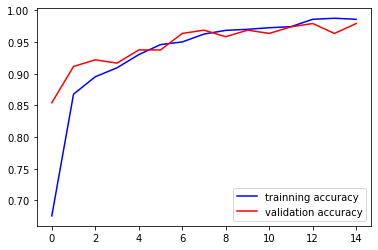

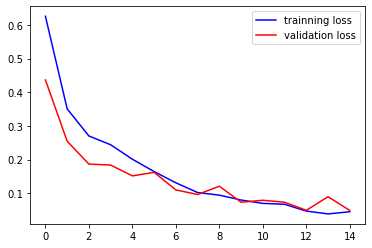

In [8]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

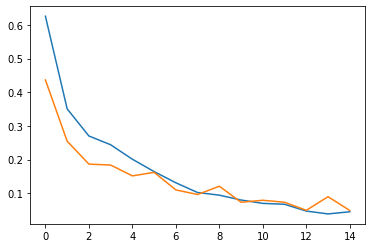

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

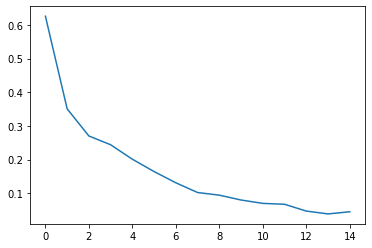

In [10]:
plt.plot(history.history['loss'])

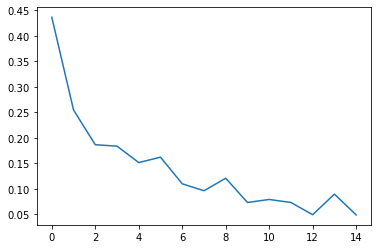

In [11]:
plt.plot(history.history['val_loss'])